### Vergleich elliptische Bahnen aus .*det files mit Kreisbahnen aus plugin.pro -> Celmech
Ich habe mithilfe des Plugins die Proof- Simulationen für die Jahre 2005, 2010, 2015 und 2021 wiederholt. Aus dem entstehenden plugin.pro file habe ich dann mithilfe von Celmech Orbdet Kreisbahnen berechnet. Dann habe ich die Bahnelemente (i- Omega) aus den *.det files und jene aus dem Output von Celmech in einem Plot dargestellt und verglichen. Man kann sehen, dass die Verteilungen von der Form her mehr oder weniger übereinstimmen, es gibt aber beträchtliche Abweichungen zwischen den Kreisbahnen von Celmech und den elliptischen Bahnen von den *.det files.

Es gab das Problem, dass Celmech aus jeder Plugin- Zeile eine Kreisbahn berechnet hat und im Output nicht mehr ersichtlich wahr, welche Bahnen zum selben Objekt gehören. Deshalb stimmt die Objektanzahl in den oben beschriebenen Plots nicht überein und man konnte nicht wirklich eine Aussage machen.

Siehe die Ergebnisse im Anhang, Ordner "Versuch 1". Die Bemerkung "without_error" bezieht sich darauf, dass ich bei dieser Version in Celmech den Noise auf Null gesezt habe. Ich habe es auch mit Noise probiert, doch dies führt (wie erwartet) zu noch grösseren Diskrepanzen.

In [1]:
from main_celmech import main_celmech
import getdata
import os

dir = os.path.join("output_celmech", "Plots")
getdata.clear_directory(dir)

years = ["2005", "2010", "2015", "2021"]
for year in years: 
    print(year)
    main_celmech(year, err = False, ell = False)

2005
05 geo
05 gto
05 fol
Results GEO Matches
Match percentage: 0.5028499050031665
Results GTO Matches
Match percentage: 0.3310165073848827
Results FollowUp Matches
Match percentage: 0.3310165073848827
2010
10 geo
10 gto
10 fol
Results GEO Matches
Match percentage: 0.34966592427616927
Results GTO Matches
Match percentage: 0.26537216828478966
Results FollowUp Matches
Match percentage: 0.26537216828478966
2015
15 geo
15 gto
15 fol
Results GEO Matches
Match percentage: 0.41767068273092367
Results GTO Matches
Match percentage: 0.41935483870967744
Results FollowUp Matches
Match percentage: 0.41935483870967744
2021
21 geo
21 gto
21 fol
Results GEO Matches
Match percentage: 0.3619817997977755
Results GTO Matches
Match percentage: 0.26620516047828824
Results FollowUp Matches
Match percentage: 0.26620516047828824


2005
05 geo
05 gto
05 fol


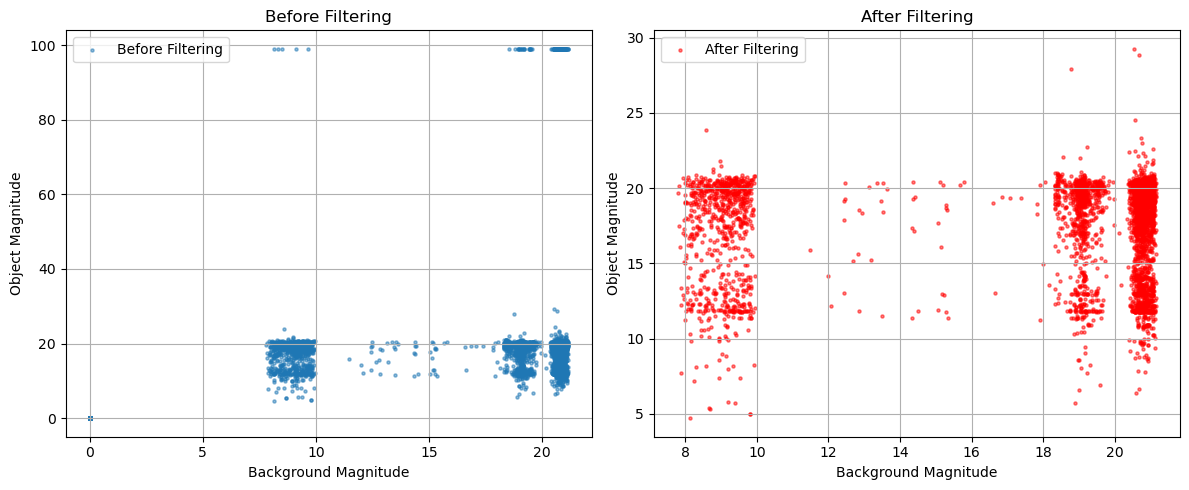

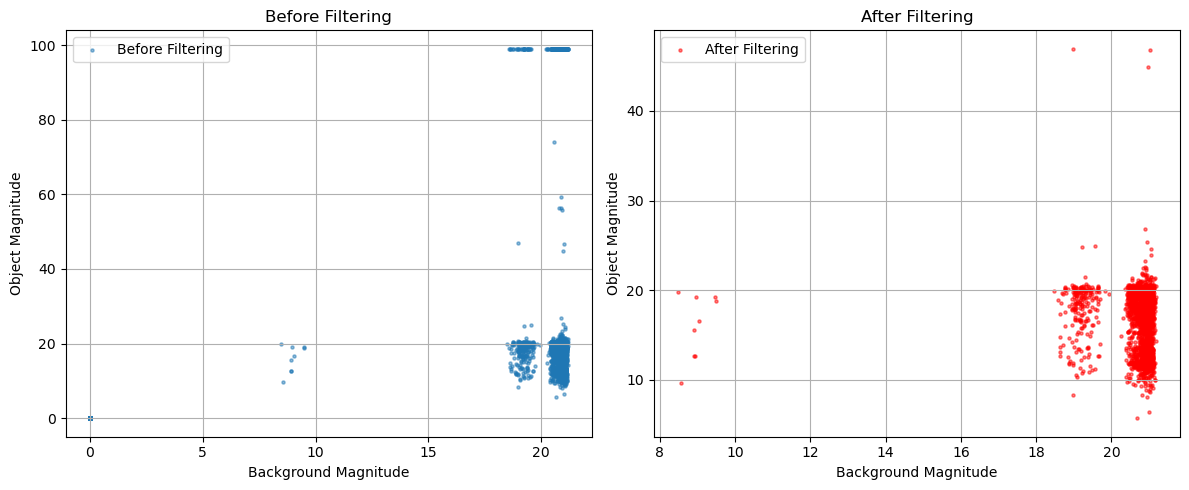

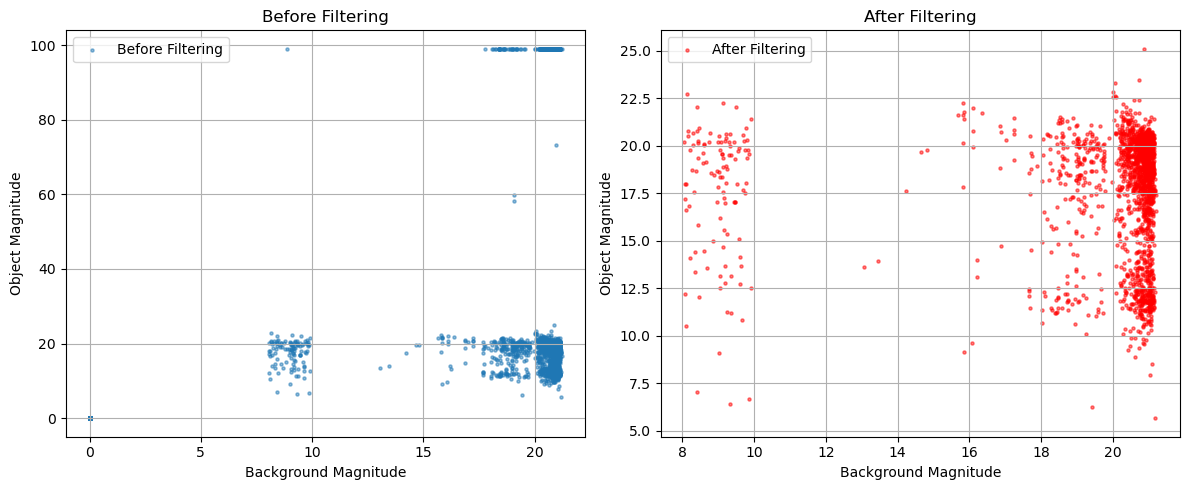

Geo dataset size: CRS=3972, Celmech=(1, 3448)
GTO dataset size: CRS=2826, Celmech=(1, 2682)
FOL dataset size: CRS=1938, Celmech=(1, 1812)
GEO - Total: 4087, Successes: 3448, Failures: 639
GTO - Total: 3325, Successes: 2682, Failures: 643
FOL - Total: 2183, Successes: 1812, Failures: 371
2010
10 geo
10 gto
10 fol


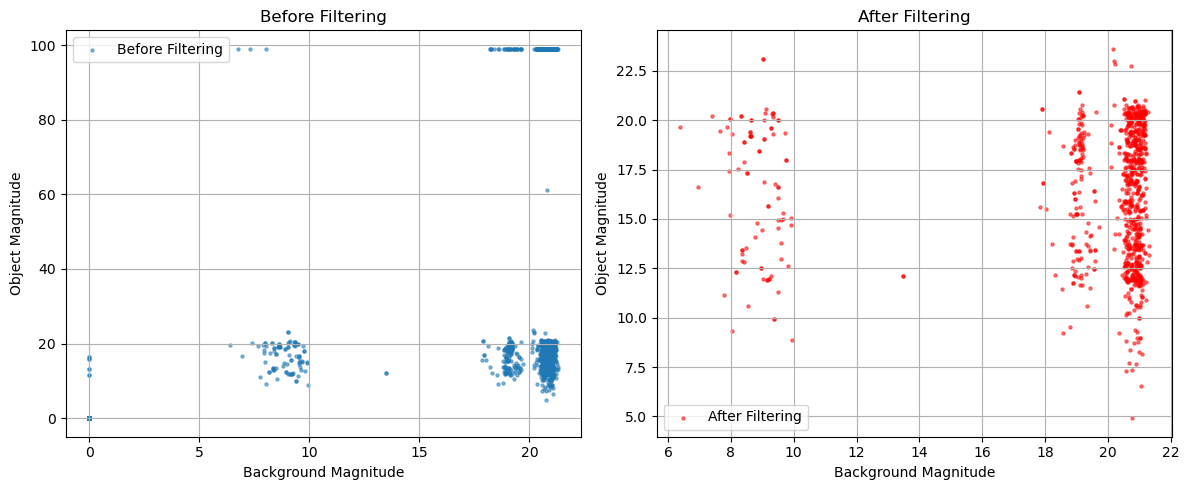

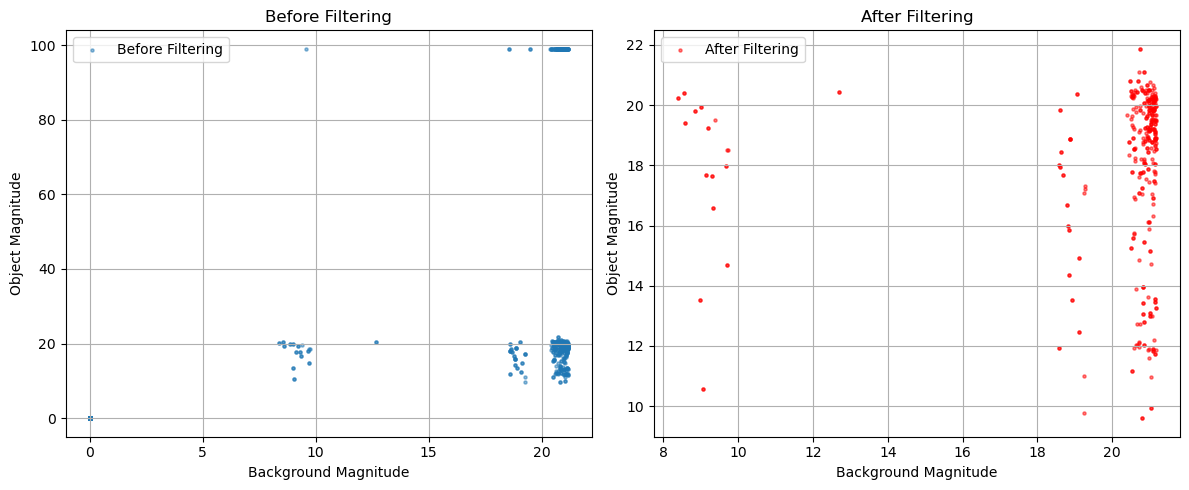

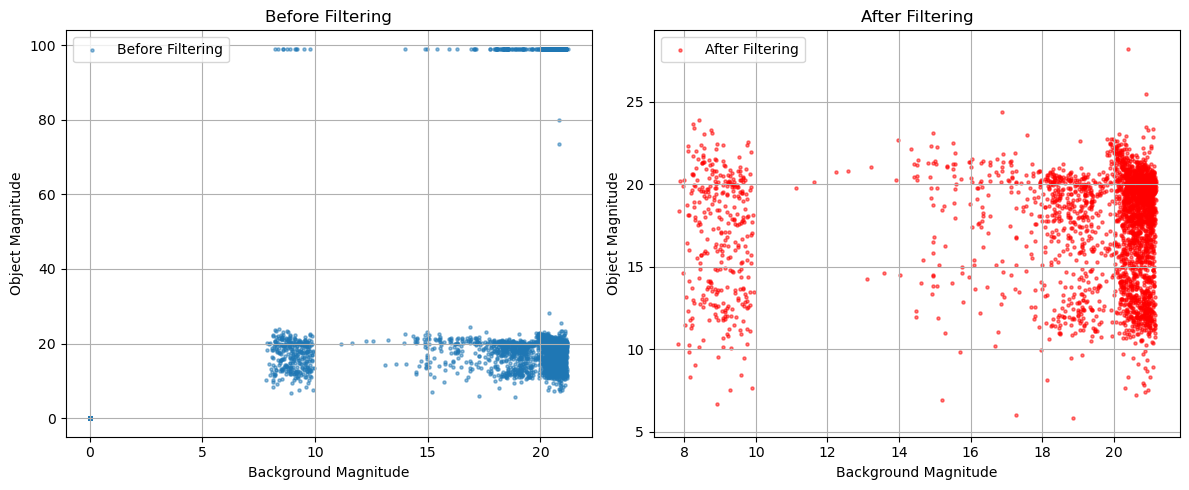

Geo dataset size: CRS=912, Celmech=(1, 912)
GTO dataset size: CRS=384, Celmech=(1, 367)
FOL dataset size: CRS=3032, Celmech=(1, 3108)
GEO - Total: 1164, Successes: 912, Failures: 252
GTO - Total: 480, Successes: 367, Failures: 113
FOL - Total: 3732, Successes: 3108, Failures: 624
2015
15 geo
15 gto
15 fol


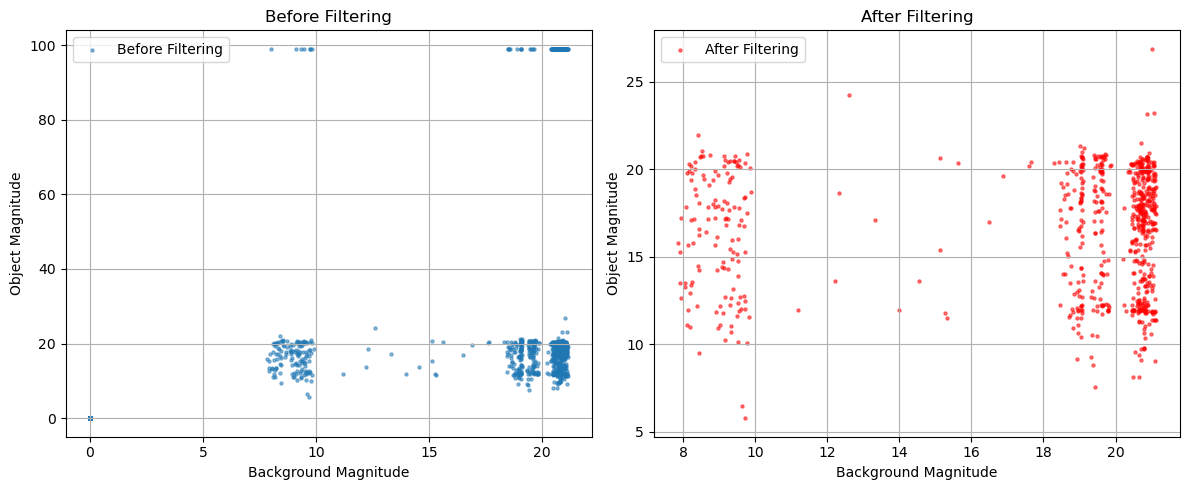

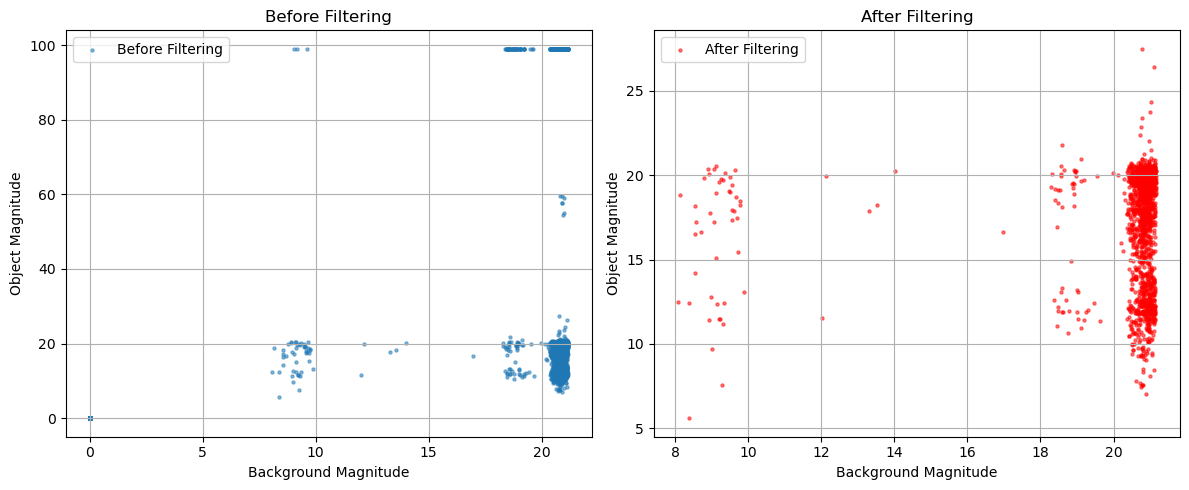

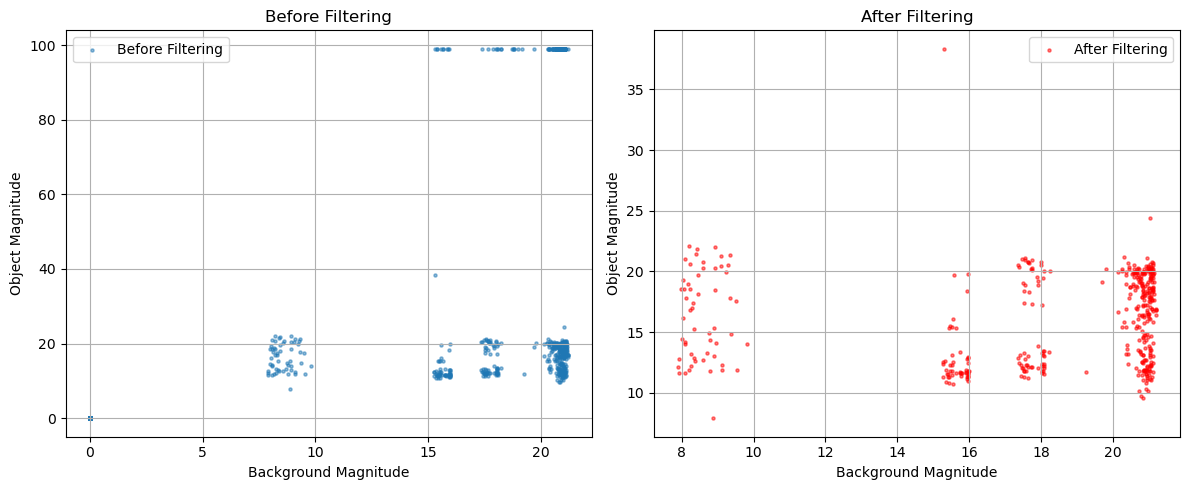

Geo dataset size: CRS=731, Celmech=(1, 712)
GTO dataset size: CRS=1603, Celmech=(1, 247)
FOL dataset size: CRS=420, Celmech=(1, 427)
GEO - Total: 853, Successes: 712, Failures: 141
GTO - Total: 309, Successes: 247, Failures: 62
FOL - Total: 503, Successes: 427, Failures: 76
2021
21 geo
21 gto
21 fol


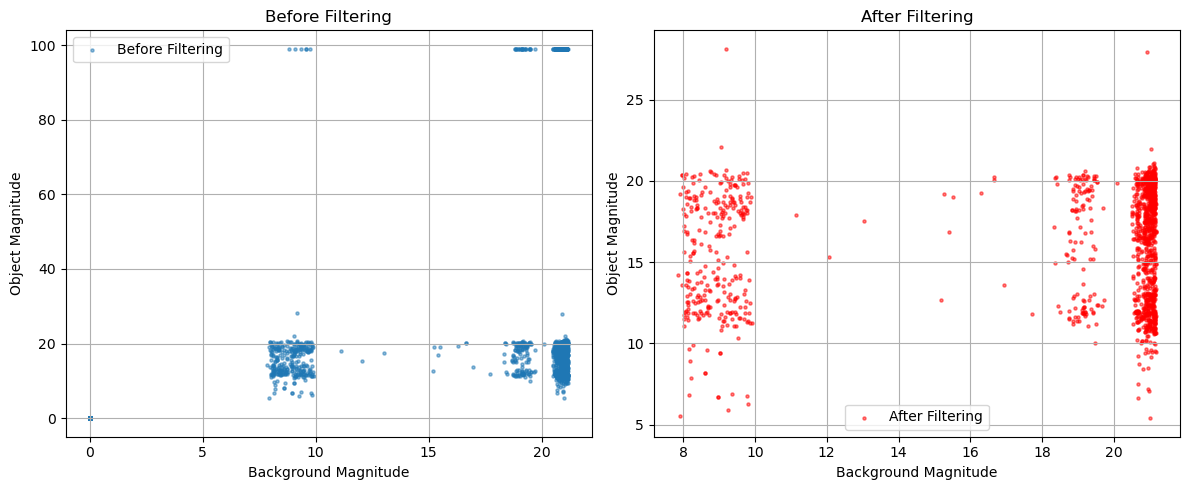

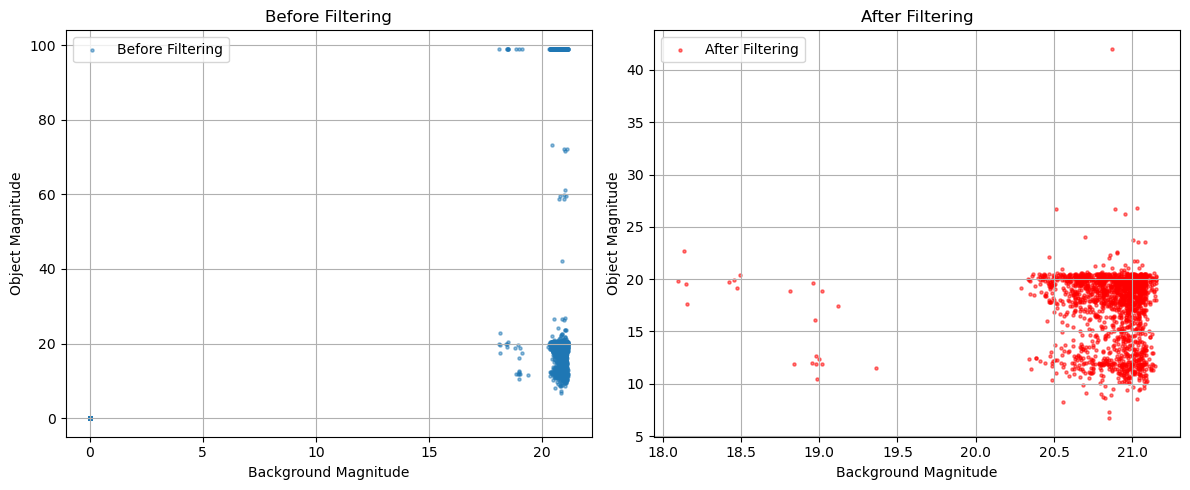

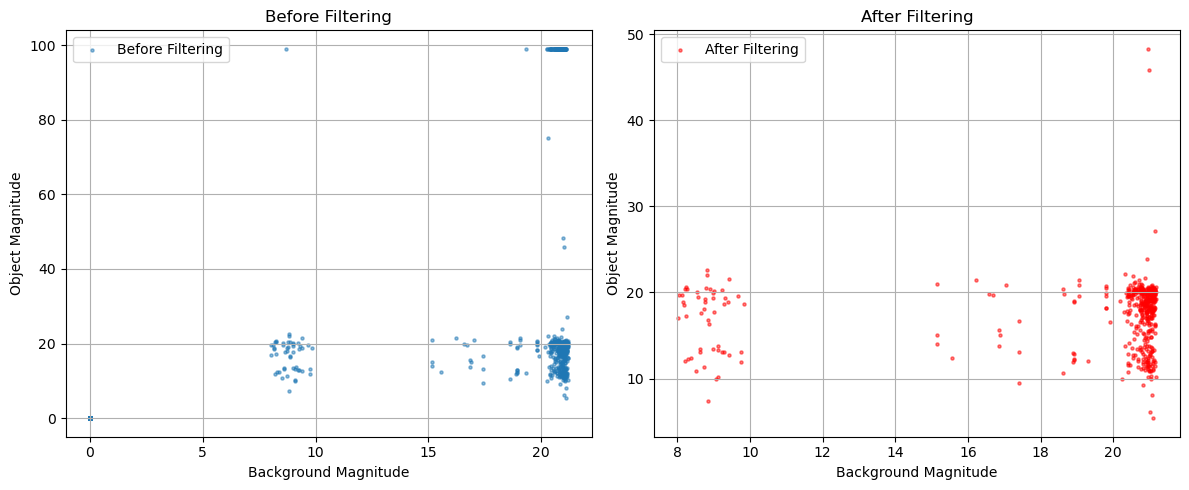

Geo dataset size: CRS=1386, Celmech=(1, 1344)
GTO dataset size: CRS=1755, Celmech=(1, 1995)
FOL dataset size: CRS=480, Celmech=(1, 450)
GEO - Total: 1604, Successes: 1344, Failures: 260
GTO - Total: 2427, Successes: 1995, Failures: 432
FOL - Total: 560, Successes: 450, Failures: 110


In [1]:
from main_celmech_2 import main_celmech_2
import getdata
import os

dir = os.path.join("output_celmech", "Plots")
getdata.clear_directory(dir)

years = ["2005", "2010", "2015", "2021"]
for year in years: 
    print(year)
    main_celmech_2(year, err = False, ell = False)

### Von hier an runter: alle gescheiterten Versuche

### TCA Hypothese (gescheitert)

**Ziel:** Verlinkung der *.crs Bahnen mit den Bahnen in Celmech oder plugin.pro über die Epoche. Celmech hat eine Epoche, das plugin hat auch eine Epoche. Leider hat das *.crs file keine Epoche.   
**Hypothese**: Der Parameter TCA (time of closest approach) kann man als Epoche benutzen. Dabei bin ich davon ausgegangen, dass TCA über den arclet gemessen wird und nicht über den gesamten Orbit, ich weiss nicht, ob die Annahme stimmt. Die Daten (TCA und Epoche aus Celmech) sind ähnlich auf ein paar Tage, jedoch stimmt es nicht genau genug, um die Epoche mit dem TCA zu vergleichen und eine Verlinkung zu erstellen. 

In [1]:
import numpy as np

dates_2021 = np.array([21043.9273835, 21044.1454312, 21044.1648628, 21045.1820848, 21045.230601,
                       21045.2481746, 21046.8764302, 21047.1887089, 21047.230377, 21047.2389037,
                       21047.2761116, 21068.2035652, 21068.2089859, 21068.8560936, 21069.1731936,
                       21070.2054229, 21070.22682, 21070.2452748, 21071.1617454, 21071.1848281,
                       21071.1868689, 21071.2565807, 21071.2550286, 21072.2155683, 21102.8933334,
                       21103.2257694, 21103.860583, 21104.9281903, 21104.9391567, 21104.9228489,
                       21104.9398259, 21105.1624978, 21105.1718169, 21105.2366265, 21128.8684194,
                       21128.9292267, 21043.8537598, 21043.8471509, 21043.8735963, 21043.8719272,
                       21043.9202861, 21043.9091035, 21044.1506257, 21044.1850721, 21044.1847362])

dates_2005 = np.array([5010.2402858, 5068.2161377, 5068.2326506, 5068.2400303, 5068.888706,
                       5070.2663938, 5071.86452, 5074.8849446, 5092.9416882, 5095.8930173,
                       5096.2317067, 5096.2273683, 5096.2394739, 5100.8794365, 5101.2003552]) 

import calculations

mjd_21 = calculations.convert_TCA_to_mjd(dates_2021)
mjd_05 = calculations.convert_TCA_to_mjd(dates_2005)

print(mjd_21)
print(mjd_05)

[59257.92737269 59258.14542824 59258.16486111 59259.18208333
 59259.23059028 59259.2481713  59260.87642361 59261.1887037
 59261.23037037 59261.23890046 59261.27611111 59282.20356481
 59282.20898148 59282.85608796 59283.17318287 59284.20541667
 59284.22681713 59284.2452662  59285.16173611 59285.18482639
 59285.18686343 59285.25657407 59285.25502315 59286.21556713
 59316.89333333 59317.22576389 59317.8605787  59318.92818287
 59318.93915509 59318.92284722 59318.93981481 59319.16248843
 59319.17180556 59319.23662037 59342.86841435 59342.92922454
 59257.85375    59257.8471412  59257.87358796 59257.8719213
 59257.92027778 59257.90909722 59258.150625   59258.18506944
 59258.1847338 ]
[53380.24027778 53438.21613426 53438.23265046 53438.24002315
 53438.8887037  53440.26638889 53441.86451389 53444.88494213
 53462.94167824 53465.89300926 53466.23170139 53466.22736111
 53466.23946759 53370.87943287 53371.20034722]


Illustration of how the matching indices works

In [3]:
list1 = [5010.2402858, 5068.2161377, 5092.9416882, 5100.4000000]
list2 = [5068.2326506, 5070.2663938, 6000.1234567]  # 6000.1234567 won't match any in list1

import calculations
matches = calculations.find_matching_indices_MJD(list1, list2, threshold=0.1)
print(matches)
print(len(matches))

[(0, None), (1, 0), (2, None), (3, None), (None, 1), (None, 2)]
6


### Vergleich Ellipsen in *.crs und Ellipsen von Celmech

In [1]:
from main_celmech import main_celmech
import getdata
import os
import plotting
import sortdata
import numpy as np

directory = os.path.join("output_celmech", "Plots5")
getdata.clear_directory(directory)

years = ["2005", "2010", "2015", "2021"]
orbit_type_list = ["geo", "gto", "fol"]
err = False

for year in years:     
    celmech_inc = []
    celmech_node = []
    for orbit in orbit_type_list: 
        a, inc, node = getdata.get_data_for_plotting_from_OUT_file(year, orbit, err = False, ell = True, compare= False)
        celmech_node.append(node)
        celmech_inc.append(inc)

    celmech_inc = np.hstack(celmech_inc)
    celmech_node = np.hstack(celmech_node)

    print(celmech_inc.shape, celmech_node.shape)
    
    # Data handling for elliptical orbits from PROOF *.crs and *.det files 
    geo_crs, gto_crs, fol_crs, geo_det, gto_det, fol_det = getdata.data_returner(year, 4)
    
    #print(f"crs geo: {len(geo_crs[1])}, crs gto {len(gto_crs[1])}, crs fol {len(fol_crs[1])},  before any sorting")
    #print("Sum of crossings:", len(geo_crs[1]) + len(gto_crs[1]) + len(fol_crs[1]))
    #print(len(geo_det[1]), len(gto_det[1]), len(fol_det[1]), "detections before any sorting")
    #print("Sum of detections:", len(geo_det[1]) + len(gto_det[1]) + len(fol_det[1]))

    ID = np.hstack([geo_crs[0], gto_crs[0], fol_crs[0]]) #stack all ID arrays
    unique_ID = set(ID)
    #print("Number of all IDs: ", len(ID),  ", unique ID crossings no sorting", len(unique_ID))
    
    #ID = np.hstack([geo_det[0], gto_det[0], fol_det[0]]) #stack all ID arrays
    #unique_ID = set(ID)
    #print("Number of all IDs: ", len(ID),  "unique ID detections no sorting", len(unique_ID))

    # Sorting for geo orbit crossings
    geo_crs = np.array(geo_crs)
    #geo_crs = geo_crs[:, :len(failed_masks[0])]
    #mask = np.array(failed_masks[0], dtype=bool).flatten()
    #geo_crs = geo_crs[:, mask]

    #remove background zero objects from *.crs file data
    #geo_crs = sortdata.remove_zero_background_mag(geo_crs, background_mag_index = 21)
    print(len(geo_crs[1]), "Number of crossings after background")
    #geo_det = sortdata.remove_zero_background_mag(geo_det, background_mag_index = 21)
    print(len(geo_det[1]), "Number of detections after background")
    TLE, fragments, rest = sortdata.sort_for_sources_all_data(geo_crs, 3)
    arrays_to_stack = []
    for arr in [TLE, fragments, rest]:
        if arr.size > 0: 
            arrays_to_stack.append(arr)

    if arrays_to_stack:
        geo_crs = np.vstack(arrays_to_stack).T
    else:
        geo_crs = np.empty((geo_crs.shape[0], 0))  
    geo_crs = sortdata.sort_for_apogee_all_data(geo_crs, 10, 8)
    geo_crs = sortdata.sort_for_inclination_all_data(geo_crs, 9, 22)
    geo_inc = geo_crs[9]
    geo_nod = geo_crs[12]
    geo_TCA = geo_crs[4] #time of closest approach

    # Sorting for gto orbit crossings
    gto_crs = np.array(gto_crs)
    #gto_crs = gto_crs[:, :len(failed_masks[1])]
    #mask = np.array(failed_masks[1], dtype=bool).flatten()
    #gto_crs = gto_crs[:, mask]
    
    #remove background zero objects from *.crs file data
    #gto_crs = sortdata.remove_zero_background_mag(gto_crs, background_mag_index = 21)
    #print(len(gto_crs[1]), "Number of crossings after background")
    #gto_det = sortdata.remove_zero_background_mag(gto_det, background_mag_index = 21)
    #print(len(gto_det[1]), "Number of detections after background")
    TLE, fragments, rest = sortdata.sort_for_sources_all_data(gto_crs, 3)    
    arrays_to_stack = []
    for arr in [TLE, fragments, rest]:
        if arr.size > 0:  
            arrays_to_stack.append(arr)
    if arrays_to_stack:
        gto_crs = np.vstack(arrays_to_stack).T 
    else:
        gto_crs = np.empty((gto_crs.shape[0], 0))  
    
    gto_crs = sortdata.sort_for_apogee_all_data(gto_crs, 10, 8)
    gto_crs = sortdata.sort_for_inclination_all_data(gto_crs, 9, 22)
    gto_inc = gto_crs[9]
    gto_nod = gto_crs[12]
    gto_TCA = gto_crs[4] #time of closest approach

    # Sorting for fol orbit crossings
    fol_crs = np.array(fol_crs)   
    #fol_crs = fol_crs[:, :len(failed_masks[2])]
    #mask = np.array(failed_masks[2], dtype=bool).flatten()
    #fol_crs = fol_crs[:, mask] 
    
    #remove background zero objects from *.crs file data
    #fol_crs = sortdata.remove_zero_background_mag(fol_crs, background_mag_index = 21)
    #print(len(fol_crs[1]), "Number of crossings after background")
    #fol_det = sortdata.remove_zero_background_mag(fol_det, background_mag_index = 21)
    #print(len(fol_det[1]), "Number of detections after background")
    common_elements = np.isin(fol_det[1], fol_crs[1], True)
    #print(len(common_elements), "number of common elements")
    TLE, fragments, rest = sortdata.sort_for_sources_all_data(fol_crs, 3)
    arrays_to_stack = []
    for arr in [TLE, fragments, rest]:
        if arr.size > 0:  
            arrays_to_stack.append(arr)

    if arrays_to_stack:
        fol_crs = np.vstack(arrays_to_stack).T 
    else:
        fol_crs = np.empty((fol_crs.shape[0], 0))  
    fol_crs = sortdata.sort_for_apogee_all_data(fol_crs, 10, 8)
    fol_crs = sortdata.sort_for_inclination_all_data(fol_crs, 9, 22)
    fol_inc = fol_crs[9]
    fol_nod = fol_crs[12]
    fol_TCA = fol_crs[4] #time of closest approach
        
    crs_inc = np.hstack([geo_inc, gto_inc, fol_inc])
    crs_raan = np.hstack([geo_nod, gto_nod, fol_nod])
    
    
    plotting.i_omega_joined(
        celmech_node, crs_raan, celmech_inc, crs_inc, 
        "title", year, "Elliptical orbits (celmech)", "Elliptical orbits (*.crs files)", directory
    )

05 geo
05 gto
05 fol
(5022,) (5022,)
6751 Number of crossings after background
1551 Number of detections after background
10 geo
10 gto
10 fol
(2495,) (2495,)
2706 Number of crossings after background
353 Number of detections after background
15 geo
15 gto
15 fol
(1715,) (1715,)
2104 Number of crossings after background
307 Number of detections after background
21 geo
21 gto
21 fol
(2268,) (2268,)
3467 Number of crossings after background
711 Number of detections after background


In [2]:
from main_celmech import main_celmech
import getdata
import os
import plotting
import sortdata
import numpy as np

directory = os.path.join("output_celmech", "Plots5")
getdata.clear_directory(directory)

years = ["2005", "2010", "2015", "2021"]
orbit_type = ["geo", "gto", "fol"]

for year in years: 
    print(year)
    #GEO
    ell_a_geo, ell_i_geo, ell_raan_geo = getdata.get_data_for_plotting_from_OUT_file(year, "geo", err = False, ell = True)
    #GTO
    ell_a_gto, ell_i_gto, ell_raan_gto = getdata.get_data_for_plotting_from_OUT_file(year, "gto", err = False, ell = True)
    #Fol   
    ell_a_fol, ell_i_fol, ell_raan_fol = getdata.get_data_for_plotting_from_OUT_file(year, "fol", err = False, ell = True)

    # Data handling for elliptical orbits
    geo_crs, gto_crs, fol_crs, geo_det, gto_det, fol_det = getdata.data_returner(year, 4)
    
    print(len(geo_crs[1]), len(gto_crs[1]), len(fol_crs[1]), "crossings before any sorting")
    print("Sum of crossings:", len(geo_crs[1]) + len(gto_crs[1]) + len(fol_crs[1]))
    print(len(geo_crs[1]), len(gto_crs[1]), len(fol_crs[1]), "crossings before any sorting")
    print("Sum of crossings:", len(geo_crs[1]) + len(gto_crs[1]) + len(fol_crs[1]))

    # Sorting for geo orbit crossings
    TLE, fragments, rest = sortdata.sort_for_sources_all_data(geo_crs, 3)
    geo_crs = np.vstack([TLE, fragments, rest]).T
    geo_crs = sortdata.sort_for_apogee_all_data(geo_crs, 10, 8)
    geo_crs = sortdata.sort_for_inclination_all_data(geo_crs, 9, 22)
    geo_inc = geo_crs[9]
    geo_nod = geo_crs[12]

    # Sorting for gto orbit crossings
    TLE, fragments, rest = sortdata.sort_for_sources_all_data(gto_crs, 3)
    gto_crs = np.vstack([TLE, fragments, rest]).T
    gto_crs = sortdata.sort_for_apogee_all_data(gto_crs, 10, 8)
    gto_crs = sortdata.sort_for_inclination_all_data(gto_crs, 9, 22)
    gto_inc = gto_crs[9]
    gto_nod = gto_crs[12]

    # Sorting for fol orbit crossings
    TLE, fragments, rest = sortdata.sort_for_sources_all_data(fol_crs, 3)
    fol_crs = np.vstack([TLE, fragments, rest]).T
    fol_crs = sortdata.sort_for_apogee_all_data(fol_crs, 10, 8)
    fol_crs = sortdata.sort_for_inclination_all_data(fol_crs, 9, 22)
    fol_inc = fol_crs[9]
    fol_nod = fol_crs[12]
    
    #GEO
    title = f"Comparison of celmech elliptical orbits and elliptical orbits from *.crs files, {year}, GEO"
    plotlen = min(len(geo_nod), len(ell_raan_geo))
    print(len(geo_nod), len(ell_raan_geo))

    # Plot inclination and RAAN comparison
    plotting.i_omega_joined(
        ell_raan_geo, geo_nod, ell_i_geo, geo_inc, 
        title, year, "Elliptical orbits (celmech)", "Elliptical orbits (*.crs files)", directory
    )
    
    #GTO
    title = f"Comparison of celmech elliptical orbits and elliptical orbits from *.crs files, {year}, GTO"
    plotlen = min(len(gto_nod), len(ell_raan_gto))
    print(len(gto_nod), len(ell_raan_gto))

    # Plot inclination and RAAN comparison
    plotting.i_omega_joined(
        ell_raan_gto, gto_nod, ell_i_gto, gto_inc, 
        title, year, "Elliptical orbits (celmech)", "Elliptical orbits (*.crs files)", directory
    )
    
    #Followup
    title = f"Comparison of celmech elliptical orbits and elliptical orbits from *.crs files, {year}, Followup"
    plotlen = min(len(fol_nod), len(ell_raan_fol))
    print(len(fol_nod), len(ell_raan_fol))

    # Plot inclination and RAAN comparison
    plotting.i_omega_joined(
        ell_raan_fol, fol_nod, ell_i_fol, fol_inc, 
        title, year, "Elliptical orbits (celmech)", "Elliptical orbits (*.crs files)", directory
    )


2005
05 geo
05 gto
05 fol
6751 6686 3279 crossings before any sorting
Sum of crossings: 16716
6751 6686 3279 crossings before any sorting
Sum of crossings: 16716
479 2276
926 1507
362 1239
2010
10 geo
10 gto
10 fol
2706 1158 6368 crossings before any sorting
Sum of crossings: 10232
2706 1158 6368 crossings before any sorting
Sum of crossings: 10232
78 312
30 227
541 1956
2015
15 geo
15 gto
15 fol
2104 4961 759 crossings before any sorting
Sum of crossings: 7824
2104 4961 759 crossings before any sorting
Sum of crossings: 7824
80 388
447 1031
70 296
2021
21 geo
21 gto
21 fol
3467 4600 855 crossings before any sorting
Sum of crossings: 8922
3467 4600 855 crossings before any sorting
Sum of crossings: 8922
347 766
494 1188
87 314


### Trying to find the problem with number of objects mismatch

In [ ]:
from main_celmech import main_celmech
import getdata
import os
import calculations
import numpy as np

year = "2005"
orbit_type = "geo"
plugin = "plugin_05_geo.pro"
dir = "input"
file_path = os.path.join(dir, plugin)

data = getdata.array_extender_plugin(file_path)
ifile = data[1]

objX = data[6]
objY = data[7]
objZ = data[8]
objVx = data[9]
objVy = data[10]
objVz = data[11]

objX = np.array(objX, dtype=float)
objY = np.array(objY, dtype=float)
objZ = np.array(objZ, dtype=float)
objVx = np.array(objVx, dtype=float)
objVy = np.array(objVy, dtype=float)
objVz = np.array(objVz, dtype=float)

#find number of objects observed (each object counted once, even if observed many times)
ifile = ifile.astype(int)

max_number = np.max(ifile)
numbers = np.arange(max_number + 1)  # Create an array from 0 to max_number
counts = np.array([np.sum(ifile == number) for number in numbers])
result_array = np.column_stack((numbers, counts))
print(result_array)
print("2005, geo, number of obj observed:", max_number)
print("Number of lines in plugin.pro file", len(ifile))
print(len(ifile)/max_number)

unique_numbers, first_occurrence_indexes = np.unique(ifile, return_index=True)
print(len(first_occurrence_indexes))

[[   0    2]
 [   1    3]
 [   2    2]
 ...
 [4092    3]
 [4093    5]
 [4094    1]]
2005, geo, number of obj observed: 4094
Number of lines in plugin.pro file 11161
2.7261846604787494
4095


### Compare orbital elements by hand (no celmech)
Um Verwirrungen aufgrund der unpassenden Objektzahlen auszuschliessen, habe ich die elliptischen Bahnen selber gerechnet (Zweikörperproblem, analytische Lösung). Somit konnte ich sicherstellen, dass für jede Zeile im plugin.pro file eine Kreisbahn (von Celmech) und eine elliptische Bahn (eigenes Programm) erstellt wurden. Man kann beträchtliche Abweichungen zwischen den Bahnelementen sehen (vielleicht ist das Zweikörperproblem eine zu grosse Vereinfachung). Im I- Omega- Raum handelt es sich Abweichungen von einigen Grad, bei den Halbachsen sind die Fehler viel grösser.

     Siehe die Ergebnisse im Anhang, Ordner "Versuch 2". Damit die Plots nicht zu überfüllt      werden, habe ich die verschiedenen Orbittypen in verschiedene Plots getan.

In [ ]:
from main_celmech import main_celmech
import getdata
import os
import calculations
import numpy as np

out_dir = os.path.join("output_celmech", "txt_files")
getdata.clear_directory(out_dir)

filepathlist = ["plugin_05_geo.pro", "plugin_05_gto.pro", "plugin_05_fol.pro",
                "plugin_10_geo.pro", "plugin_10_gto.pro", "plugin_10_fol.pro",
                "plugin_15_geo.pro", "plugin_15_gto.pro", "plugin_15_fol.pro",
                "plugin_21_geo.pro", "plugin_21_gto.pro", "plugin_21_fol.pro"]
dir = "input"
for file in filepathlist:
    year = "20"+file[7]+file[8]
    orbit_type = file[10:13]
    file = os.path.join(dir, file)
    
    calculations.from_plugin_to_orbital_elements(file, year, orbit_type)
    

Data written to orbital_elements_from_plugin_2005_geo successfully.
Data written to orbital_elements_from_plugin_2005_gto successfully.
Data written to orbital_elements_from_plugin_2005_fol successfully.
Data written to orbital_elements_from_plugin_2010_geo successfully.
Data written to orbital_elements_from_plugin_2010_gto successfully.
Data written to orbital_elements_from_plugin_2010_fol successfully.
Data written to orbital_elements_from_plugin_2015_geo successfully.
Data written to orbital_elements_from_plugin_2015_gto successfully.
Data written to orbital_elements_from_plugin_2015_fol successfully.
Data written to orbital_elements_from_plugin_2021_geo successfully.
Data written to orbital_elements_from_plugin_2021_gto successfully.
Data written to orbital_elements_from_plugin_2021_fol successfully.


In [2]:
import getdata
import plotting
import numpy as np
import os

directory = os.path.join("output_celmech", "Plots2")
getdata.clear_directory(directory)


orbit_filelist = ["orbital_elements_from_plugin_2005_geo", "orbital_elements_from_plugin_2005_gto", "orbital_elements_from_plugin_2005_fol", 
                  "orbital_elements_from_plugin_2010_geo", "orbital_elements_from_plugin_2010_gto", "orbital_elements_from_plugin_2010_fol", 
                  "orbital_elements_from_plugin_2015_geo", "orbital_elements_from_plugin_2015_gto", "orbital_elements_from_plugin_2015_fol", 
                  "orbital_elements_from_plugin_2021_geo", "orbital_elements_from_plugin_2021_gto", "orbital_elements_from_plugin_2021_fol"]

orbit_type_list = ["geo", "gto", "fol"]
year_list = ["2005", "2010", "2015", "2021"]
err = False
maxinc = 22 
apogee_threshold = 10000  

# Initialize the data dictionary for each orbit type
orbit_data_dict = {
    "geo": {"num_obs": [], "rms": [], "time_interval": [], "num_iter": [], 
            "P": [], "A": [], "E": [], "I": [], "Node": [], "Per": [], "IPer": []},
    "gto": {"num_obs": [], "rms": [], "time_interval": [], "num_iter": [], 
            "P": [], "A": [], "E": [], "I": [], "Node": [], "Per": [], "IPer": []},
    "fol": {"num_obs": [], "rms": [], "time_interval": [], "num_iter": [], 
            "P": [], "A": [], "E": [], "I": [], "Node": [], "Per": [], "IPer": []}
}

for year in year_list: 
    for orbit in orbit_type_list:
        files = []
        file = getdata.get_celmech_OUT_files(year, orbit, err, ell = False)
        file = os.path.join("input_celmech", file)
        files.append(file)
        orbit_data, number_of_obj = getdata.get_orbele_from_celmech(files)
        
        # Populate the orbit_data_dict for the current orbit type
        orbit_data_dict[orbit]["num_obs"].append(orbit_data[0])
        orbit_data_dict[orbit]["rms"].append(orbit_data[1])
        orbit_data_dict[orbit]["time_interval"].append(orbit_data[2])
        orbit_data_dict[orbit]["num_iter"].append(orbit_data[3])
        orbit_data_dict[orbit]["P"].append(orbit_data[4])
        orbit_data_dict[orbit]["A"] = np.append(orbit_data_dict[orbit]["A"], orbit_data[5])
        orbit_data_dict[orbit]["E"] = np.append(orbit_data_dict[orbit]["E"], orbit_data[6])
        orbit_data_dict[orbit]["I"] = np.append(orbit_data_dict[orbit]["I"], orbit_data[7])
        orbit_data_dict[orbit]["Node"] = np.append(orbit_data_dict[orbit]["Node"], orbit_data[8])
        orbit_data_dict[orbit]["Per"] = np.append(orbit_data_dict[orbit]["Per"], orbit_data[9])
        orbit_data_dict[orbit]["IPer"] = np.append(orbit_data_dict[orbit]["IPer"], orbit_data[10])

        # Apply filtering based on inclination and apogee
        inc_data = np.array(orbit_data_dict[orbit]["I"])
        node_data = np.array(orbit_data_dict[orbit]["Node"])
        ecc_data = np.array(orbit_data_dict[orbit]["E"])
        a_data = np.array(orbit_data_dict[orbit]["A"])

        mask = inc_data <= maxinc
        orbit_data_dict[orbit]["I"] = inc_data[mask]
        orbit_data_dict[orbit]["Node"] = node_data[mask]
        orbit_data_dict[orbit]["E"] = ecc_data[mask]
        orbit_data_dict[orbit]["A"] = a_data[mask]

        assert len(orbit_data_dict[orbit]["I"]) == len(orbit_data_dict[orbit]["Node"]), "Filtering went wrong"   

        apogee = orbit_data_dict[orbit]["A"] * (1 + orbit_data_dict[orbit]["E"])
        mask_apogee = apogee >= apogee_threshold
        orbit_data_dict[orbit]["I"] = orbit_data_dict[orbit]["I"][mask_apogee]
        orbit_data_dict[orbit]["Node"] = orbit_data_dict[orbit]["Node"][mask_apogee]
        orbit_data_dict[orbit]["A"] = orbit_data_dict[orbit]["A"][mask_apogee]
# Loop to generate plots
for orbit_file in orbit_filelist:
    orbit_file_path = os.path.join("output_celmech", "txt_files", orbit_file)

    year = orbit_file.split('_')[4] 
    orbit_type = orbit_file.split('_')[5] 
    print(f"Processing: {orbit_file_path}")
    #print(f"Year: {year}, Orbit Type: {orbit_type}")
    
    # Data: Proof plugin generated *.pro files, my code made elliptical orbits
    orbit_data = getdata.array_extender_orbital_data(orbit_file_path)
    orbit_i = orbit_data[8]
    orbit_raan = orbit_data[9]
    orbit_a = orbit_data[6]
    
    # Data: Proof plugin generated *.pro files, celmech made circular orbits
    celmech_raan = orbit_data_dict[orbit_type]["Node"]  
    celmech_i = orbit_data_dict[orbit_type]["I"]        
    celmech_a = orbit_data_dict[orbit_type]["A"]  
    
    #print("Proof plugin generated *.pro files, my code made elliptical orbits", len(orbit_a), orbit_a)
    #print("Proof plugin generated *.pro files, celmech made circular orbits", len(celmech_a), celmech_a)
    
    # Generate comparison plots
    title = f"Comparison of orbital elements {year}, {orbit_type}"
    directory = os.path.join("output_celmech", "Plots2")


    plotlen = min(len(celmech_raan), len(orbit_raan)) - 1

    # Plot inclination and RAAN comparison
    plotting.i_omega_joined(
        orbit_raan[:plotlen], celmech_raan[:plotlen], orbit_i[:plotlen], celmech_i[:plotlen], 
        title, year, "Elliptical orbits (2body problem)", "Circular orbits (celmech)", directory
    )
    
    # Plot semi-major axis comparison
    plotting.compare_semi_major_plot(
        orbit_a[:plotlen], celmech_a[:plotlen], "title", year, orbit_type, 
        "Elliptical orbits (2body problem)", "Circular orbits (celmech)", directory
    )

05 geo
05 gto
05 fol
10 geo
10 gto
10 fol
15 geo
15 gto
15 fol
21 geo
21 gto
21 fol
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2005_geo
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2005_gto
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2005_fol
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2010_geo
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2010_gto
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2010_fol
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2015_geo
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2015_gto
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2015_fol
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2021_geo
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2021_gto
Processing: output_celmech\txt_files\orbital_elements_from_plugin_2021_fol


### Vergleich Celmech Kreisbahnen mit Celmech elliptischen Bahnen
Da Proof wohl nicht nur das Zweikörperproblem benutzt, um elliptische Bahnen zu rechnen, habe ich mit Celmech aus denselben plugin.pro files elliptische Bahnen erstellt und diese mit den Kreisbahnen von Celmech verglichen. Damit sind Störungen weiterer Körper und die Abflachung der Erde(C_20) eingerechnet. Die Objektanzahl weicht von obigen Zahlen ab, da ich nur jene Objekte eingerechnet habe, von welchen es mindestens 3 Beobachtungen gibt (sonst kann Celmech keine elliptische Bahn rechnen). Man sieht immer noch Abweichungen zwischen Kreis- und Ellipsenbahnen von einigen Grad (weniger schlimm als beim Zweikörperproblem) in den I- Omega- Plots und grobe Fehler bei den Halbachsen.

Siehe die Ergebnisse im Anhang, Ordner "Versuch 3".

In [ ]:
from main_celmech import main_celmech
import getdata
import os
import plotting

directory = os.path.join("output_celmech", "Plots3")
getdata.clear_directory(directory)

years = ["2005", "2010", "2015", "2021"]
orbit_type = ["geo", "gto", "fol"]

for orbit in orbit_type: 
    for year in years: 
        print(year)
        circ_a, circ_i, circ_raan = getdata.get_data_for_plotting_from_OUT_file(year, orbit, err = False, ell = False, compare = True)
        ell_a, ell_i, ell_raan = getdata.get_data_for_plotting_from_OUT_file(year, orbit, err = False, ell = True)
                
        title = f"Comparison of celmech circular orbits and celmech elliptical orbits, {year}"
        plotlen = min(len(circ_raan), len(ell_raan))
        
        # Plot inclination and RAAN comparison
        plotting.i_omega_joined(
            ell_raan[:plotlen], circ_raan[:plotlen], ell_i[:plotlen], circ_i[:plotlen], 
            title, year, "Elliptical orbits (celmech)", "Circular orbits (celmech)", directory
        )
        
        # Plot semi-major axis comparison
        plotting.compare_semi_major_plot(
            ell_a[:plotlen], circ_a[:plotlen], title, year, orbit, 
            "Elliptical orbits (celmech)", "Circular orbits (celmech)", directory
        )

2005
05 geo
05 geo
2010
10 geo
10 geo
2015
15 geo
15 geo
2021
21 geo
21 geo
2005
05 gto
05 gto
2010
10 gto
10 gto
2015
15 gto
15 gto
2021
21 gto
21 gto
2005
05 fol
05 fol
2010
10 fol
10 fol
2015
15 fol
15 fol
2021
21 fol
21 fol


Zusammenfassend hat die Verwendung von Kreisbahnen also vermutlich zu einer Verfälschung der Resultate geführt. Im I- Omega- Raum sind einige Cluster möglicherweise verschmiert oder verschoben. Beispielsweise das Fehlen des 8° - Bandes bei den Beobachtungen könnte vielleicht so erklärt werden.

Zusammenfassend hat die Verwendung von Kreisbahnen also vermutlich zu einer Verfälschung der Resultate geführt. Im I- Omega- Raum sind einige Cluster möglicherweise verschmiert oder verschoben. Beispielsweise das Fehlen des 8° - Bandes bei den Beobachtungen könnte vielleicht so erklärt werden.

# Versuch 4

gescheitert, nicht erwähneswert
Idee war folgendes: Aus dem Celmech Output das Datum rausholen
Dieses Datum in MJD konvertieren
im det file die entsprechenden Bahnen raussuchen
Vergleich

Problem: im det file gibt es kein Datum!

In [ ]:
from main_celmech import main_celmech_matching
import getdata
import os

dir = os.path.join("output_celmech", "Plots")
getdata.clear_directory(dir)

years = ["2005", "2010", "2015", "2021"]
for year in years: 
    print(year)
    print("Without errors")
    main_celmech_matching(year, err = False)
    #print("With errors")
    #main_celmech(year, err = True)

2005
Without errors
05 geo
Date list from celmech file: [53374.86733796308, 53374.86763888877, 53374.86835648166, 53374.863333333284, 53374.86405092571, 53374.8647685186, 53374.87481481489, 53374.87553240731, 53374.86863425933, 53374.869074074086, 53374.86979166651, 53374.8705092594, 53374.8647685186, 53374.865486111026, 53374.86620370392, 53374.87034722231, 53374.8705092594, 53374.87122685183, 53374.871944444254, 53374.86733796308, 53374.86763888877, 53374.86835648166, 53374.869074074086, 53374.874097222, 53374.87481481489, 53374.87553240731, 53374.87106481474, 53374.87122685183, 53374.871944444254, 53374.871944444254, 53374.872662037145, 53374.87337962957, 53375.81546296319, 53375.816180555616, 53375.81689814804, 53375.816134259105, 53375.816180555616, 53375.81689814804, 53375.81761574093, 53375.818310185336, 53375.81833333336, 53375.819050925784, 53375.819768518675, 53375.8204861111, 53375.82104166644, 53375.82120370353, 53375.82192129642, 53375.82263888884, 53375.82976851845, 53375

<Figure size 640x480 with 0 Axes>

# Vergleich elliptische Bahnen von Celmech mit den *.det Bahnen

In [2]:
from main_celmech import main_celmech
import getdata
import os
import plotting
import sortdata
import numpy as np

directory = os.path.join("output_celmech", "Plots4")
getdata.clear_directory(directory)

years = ["2005", "2010", "2015", "2021"]
orbit_type = ["geo", "gto", "fol"]

for year in years: 
    print(year)
    #GEO
    ell_a_geo, ell_i_geo, ell_raan_geo = getdata.get_data_for_plotting_from_OUT_file(year, "geo", err = False, ell = True)
    #GTO
    ell_a_gto, ell_i_gto, ell_raan_gto = getdata.get_data_for_plotting_from_OUT_file(year, "gto", err = False, ell = True)
    #Fol   
    ell_a_fol, ell_i_fol, ell_raan_fol = getdata.get_data_for_plotting_from_OUT_file(year, "fol", err = False, ell = True)

    # Data handling for elliptical orbits
    geo_crs, gto_crs, fol_crs, geo_det, gto_det, fol_det = getdata.data_returner(year, 4)
    
    print(len(geo_crs[1]), len(gto_crs[1]), len(fol_crs[1]), "crossings before any sorting")
    print("Sum of crossings:", len(geo_crs[1]) + len(gto_crs[1]) + len(fol_crs[1]))
    print(len(geo_det[1]), len(gto_det[1]), len(fol_det[1]), "detections before any sorting")
    print("Sum of detections:", len(geo_det[1]) + len(gto_det[1]) + len(fol_det[1]))

    # Sorting for geo orbit detections
    TLE, fragments, rest = sortdata.sort_for_sources_all_data(geo_det, 3)
    geo_det = np.vstack([TLE, fragments, rest]).T
    geo_det = sortdata.sort_for_apogee_all_data(geo_det, 10, 8)
    geo_det = sortdata.sort_for_inclination_all_data(geo_det, 9, 22)
    geo_inc = geo_det[9]
    geo_nod = geo_det[12]

    # Sorting for gto orbit detections
    TLE, fragments, rest = sortdata.sort_for_sources_all_data(gto_det, 3)
    gto_det = np.vstack([TLE, fragments, rest]).T
    gto_det = sortdata.sort_for_apogee_all_data(gto_det, 10, 8)
    gto_det = sortdata.sort_for_inclination_all_data(gto_det, 9, 22)
    gto_inc = gto_det[9]
    gto_nod = gto_det[12]

    # Sorting for fol orbit detections
    TLE, fragments, rest = sortdata.sort_for_sources_all_data(fol_det, 3)
    fol_det = np.vstack([TLE, fragments, rest]).T
    fol_det = sortdata.sort_for_apogee_all_data(fol_det, 10, 8)
    fol_det = sortdata.sort_for_inclination_all_data(fol_det, 9, 22)
    fol_inc = fol_det[9]
    fol_nod = fol_det[12]
    
    #GEO
    title = f"Comparison of celmech elliptical orbits and elliptical orbits from *.det files, {year}, GEO"
    plotlen = min(len(geo_nod), len(ell_raan_geo))
    print(len(geo_nod), len(ell_raan_geo))

    # Plot inclination and RAAN comparison
    plotting.i_omega_joined(
        ell_raan_geo, geo_nod, ell_i_geo, geo_inc, 
        title, year, "Elliptical orbits (celmech)", "Elliptical orbits (*.det files)", directory
    )
    
    #GTO
    title = f"Comparison of celmech elliptical orbits and elliptical orbits from *.det files, {year}, GTO"
    plotlen = min(len(gto_nod), len(ell_raan_gto))
    print(len(gto_nod), len(ell_raan_gto))

    # Plot inclination and RAAN comparison
    plotting.i_omega_joined(
        ell_raan_gto, gto_nod, ell_i_gto, gto_inc, 
        title, year, "Elliptical orbits (celmech)", "Elliptical orbits (*.det files)", directory
    )
    
    #Followup
    title = f"Comparison of celmech elliptical orbits and elliptical orbits from *.det files, {year}, Followup"
    plotlen = min(len(fol_nod), len(ell_raan_fol))
    print(len(fol_nod), len(ell_raan_fol))

    # Plot inclination and RAAN comparison
    plotting.i_omega_joined(
        ell_raan_fol, fol_nod, ell_i_fol, fol_inc, 
        title, year, "Elliptical orbits (celmech)", "Elliptical orbits (*.det files)", directory
    )

2005
05 geo
05 gto
05 fol
6751 6686 3279 crossings before any sorting
Sum of crossings: 16716
1551 1231 787 detections before any sorting
Sum of detections: 3569
128 2276
331 1507
137 1239
2010
10 geo
10 gto
10 fol
2706 1158 6368 crossings before any sorting
Sum of crossings: 10232
353 125 1132 detections before any sorting
Sum of detections: 1610
18 312
13 227
190 1956
2015
15 geo
15 gto
15 fol
2104 4961 759 crossings before any sorting
Sum of crossings: 7824
307 794 211 detections before any sorting
Sum of detections: 1312
26 388
165 1031
25 296
2021
21 geo
21 gto
21 fol
3467 4600 855 crossings before any sorting
Sum of crossings: 8922
711 759 183 detections before any sorting
Sum of detections: 1653
130 766
154 1188
32 314
